In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("RKI_COVID19.csv", parse_dates=["Meldedatum", "Datenstand", "Refdatum"])

In [3]:
data["Meldedatum_YM"] = data["Meldedatum"].dt.strftime("%Y-%m")

In [4]:
cond_no_unbekannt = (data["Geschlecht"] != "unbekannt") & (data["Altersgruppe"] != "unbekannt")
groups = [
    "Meldedatum_YM", 
    "Geschlecht", 
    "Altersgruppe"
]

In [5]:
died = data[cond_no_unbekannt & (data.NeuerTodesfall.isin([0, 1]))].groupby(groups).agg({"AnzahlTodesfall": "sum"}).rename(columns={"AnzahlTodesfall": "Count"})
died

Count
Meldedatum_YM Geschlecht Altersgruppe       
2020-03       M          A15-A34           2
                         A35-A59         137
                         A60-A79         773
                         A80+            827
              W          A15-A34           2
                         A35-A59          35
                         A60-A79         257
                         A80+            624
2020-04       M          A15-A34          10
                         A35-A59         141
                         A60-A79        1111
                         A80+           1646
              W          A00-A04           1
                         A15-A34           3
                         A35-A59          64
                         A60-A79         552
                         A80+           2144
2020-05       M          A35-A59          22
                         A60-A79         131
                         A80+            199
              W          A35-A59           9
                         A60-A79          73
                         A80+            238
2020-06       M          A35-A59          11
                         A60-A79          29
                         A80+             23
              W          A35-A59           6
                         A60-A79          20
                         A80+             48
2020-07       M          A15-A34           1
                         A35-A59           8
                         A60-A79          38
                         A80+             34
              W          A35-A59           4
                         A60-A79          14
                         A80+             34
2020-08       M          A35-A59           7
                         A60-A79          18
                         A80+             25
              W          A15-A34           1
                         A35-A59           3
                         A60-A79          13
                         A80+             32
2020-09       M          A35-A59           5
                         A60-A79          28
                         A80+             49
              W          A15-A34           1
                         A35-A59           1
                         A60-A79          13
                         A80+             36
2020-10       M          A80+              1

In [6]:
recovered = data[cond_no_unbekannt & (data.NeuGenesen.isin([0, 1]))].groupby(groups).agg({"AnzahlGenesen": "sum"}).rename(columns={"AnzahlGenesen": "Count"})
recovered

Count
Meldedatum_YM Geschlecht Altersgruppe       
2020-01       M          A15-A34           2
                         A35-A59           3
              W          A00-A04           1
                         A15-A34           1
2020-02       M          A00-A04           3
...                                      ...
2020-10       M          A15-A34           1
                         A35-A59           3
              W          A15-A34           1
                         A35-A59           1
                         A60-A79           1

[103 rows x 1 columns]

In [7]:
resolved = died.add(recovered, fill_value=0)
resolved

Count
Meldedatum_YM Geschlecht Altersgruppe       
2020-01       M          A15-A34         2.0
                         A35-A59         3.0
              W          A00-A04         1.0
                         A15-A34         1.0
2020-02       M          A00-A04         3.0
...                                      ...
2020-10       M          A35-A59         3.0
                         A80+            1.0
              W          A15-A34         1.0
                         A35-A59         1.0
                         A60-A79         1.0

[104 rows x 1 columns]

In [8]:
cfr = died.divide(resolved).multiply(100).rename(columns={"Count": "Percentage"})
cfr

Percentage
Meldedatum_YM Geschlecht Altersgruppe            
2020-01       M          A15-A34              NaN
                         A35-A59              NaN
              W          A00-A04              NaN
                         A15-A34              NaN
2020-02       M          A00-A04              NaN
...                                           ...
2020-10       M          A35-A59              NaN
                         A80+               100.0
              W          A15-A34              NaN
                         A35-A59              NaN
                         A60-A79              NaN

[104 rows x 1 columns]

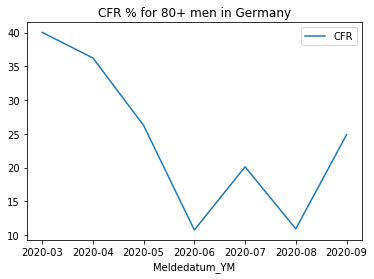

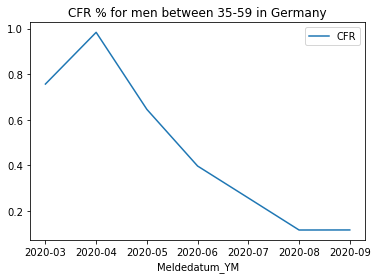

In [9]:
# An example
import matplotlib.pyplot as plt

tcfr = cfr.reset_index()

_ = tcfr[(tcfr["Meldedatum_YM"] != "2020-10") & (tcfr["Geschlecht"] == "M") & (tcfr["Altersgruppe"] == "A80+")] \
    .groupby("Meldedatum_YM") \
    .Percentage.agg(["first"]) \
    .rename(columns={"first": "CFR"}).plot(title="CFR % for 80+ men in Germany")

_ = tcfr[(tcfr["Meldedatum_YM"] != "2020-10") & (tcfr["Geschlecht"] == "M") & (tcfr["Altersgruppe"] == "A35-A59")] \
    .groupby("Meldedatum_YM") \
    .Percentage.agg(["first"]) \
    .rename(columns={"first": "CFR"}).plot(title="CFR % for men between 35-59 in Germany")
